In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

## Data Set Characteristic

### Number of Instances
20640

### Number of Attributes
8 numeric, predictive attributes and the target

### Attributes Information

1. MedInc median income in block
2. HouseAge median house age in block
3. AveRooms average number of rooms
4. AveBedrms average number of bedrooms
5. Population block population
6. AveOccup average house occupancy
7. Latitude house block latitude
8. Longitude house block longitude

### Target 

The target variable is the meedian house value in units of 100,000 for California districts


In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
from sklearn.model_selection import train_test_split
X_train_full,X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape

(11610, 8)

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=(8,)),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=["mae"])

In [12]:
model_history = model.fit(X_train,y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7414 - val_mae: 0.6560
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6221 - val_mae: 0.5870
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5779 - val_mae: 0.5550
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5572 - val_mae: 0.5496
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.5305 - val_mae: 0.5319
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.5113 - val_mae: 0.5224
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4974 - val_mae: 0.5151
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [13]:
mae_test= model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3993 - mae: 0.4595


In [14]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577126979827881,
  0.593418538570404,
  0.5557191371917725,
  0.5271904468536377,
  0.5032975673675537,
  0.48535552620887756,
  0.47091808915138245,
  0.45779937505722046,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.42605164647102356,
  0.42017653584480286,
  0.41549986600875854,
  0.4111650288105011,
  0.4077068865299225,
  0.40395283699035645,
  0.4004494547843933,
  0.39796024560928345],
 'mae': [0.9900256991386414,
  0.6041509509086609,
  0.5618006587028503,
  0.5398454070091248,
  0.5237293839454651,
  0.5112563371658325,
  0.5010154247283936,
  0.492448091506958,
  0.4857262969017029,
  0.4797375202178955,
  0.4744163453578949,
  0.4703480303287506,
  0.46740883588790894,
  0.46360209584236145,
  0.461266428232193,
  0.4591343402862549,
  0.45687004923820496,
  0.4545365273952484,
  0.4521065056324005,
  0.45083147287368774],
 'val_loss': [0.7413728833198547,
  0.6220595240592957,
  0.5779173374176025,
  0.55718696117

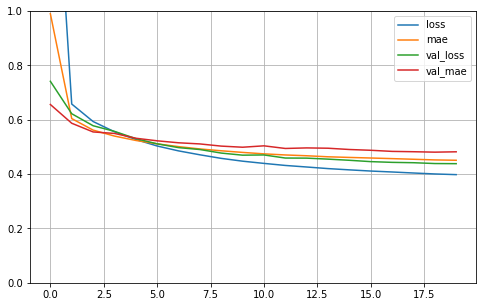

In [15]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [16]:
X_new = X_test[:3]

In [17]:
y_pred = model.predict(X_new)

In [18]:
print(y_pred)

[[0.48965678]
 [1.9347277 ]
 [3.6413553 ]]


In [19]:
print(y_test[:3])

[0.477   0.458   5.00001]


In [20]:
del model

In [21]:
keras.backend.clear_session()

## Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a wide & Deep neural network connects all or part of the inputs directly to the output layer

In [22]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_],outputs=[output])


In [23]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

In [24]:
 model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["mae"])

In [25]:
model_history = model.fit(X_train,y_train, epochs=40, validation_data=(X_valid,y_valid))

Epoch 1/40
363/363 [==============================] - 1s 4ms/step - loss: 1.6920 - mae: 0.8893 - val_loss: 0.7316 - val_mae: 0.6088
Epoch 2/40
363/363 [==============================] - 1s 3ms/step - loss: 0.6836 - mae: 0.5994 - val_loss: 0.6670 - val_mae: 0.5999
Epoch 3/40
363/363 [==============================] - 1s 3ms/step - loss: 0.6265 - mae: 0.5775 - val_loss: 0.6248 - val_mae: 0.5768
Epoch 4/40
363/363 [==============================] - 1s 3ms/step - loss: 0.5877 - mae: 0.5581 - val_loss: 0.5963 - val_mae: 0.5662
Epoch 5/40
363/363 [==============================] - 1s 3ms/step - loss: 0.5566 - mae: 0.5421 - val_loss: 0.5699 - val_mae: 0.5521
Epoch 6/40
363/363 [==============================] - 1s 3ms/step - loss: 0.5312 - mae: 0.5298 - val_loss: 0.5498 - val_mae: 0.5416
Epoch 7/40
363/363 [==============================] - 1s 3ms/step - loss: 0.5108 - mae: 0.5186 - val_loss: 0.5336 - val_mae: 0.5350
Epoch 8/40
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [26]:
mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3903 - mae: 0.4530


In [27]:
model_history.history

{'loss': [1.6920058727264404,
  0.6836402416229248,
  0.626488208770752,
  0.5877465605735779,
  0.5565560460090637,
  0.5311981439590454,
  0.5107864141464233,
  0.4951667785644531,
  0.4802228510379791,
  0.4684668779373169,
  0.4589638113975525,
  0.45022013783454895,
  0.4432655870914459,
  0.4363251328468323,
  0.4306240975856781,
  0.425344318151474,
  0.4212935268878937,
  0.41681814193725586,
  0.4126456081867218,
  0.4095860421657562,
  0.40596330165863037,
  0.4029441177845001,
  0.4000454545021057,
  0.3971884548664093,
  0.394621342420578,
  0.39249080419540405,
  0.39049339294433594,
  0.38845276832580566,
  0.3867104947566986,
  0.38484394550323486,
  0.38295260071754456,
  0.3815838396549225,
  0.3805270493030548,
  0.3787004351615906,
  0.3775610029697418,
  0.37629953026771545,
  0.3750823438167572,
  0.37408900260925293,
  0.37281930446624756,
  0.3716435730457306],
 'mae': [0.8892966508865356,
  0.5993584394454956,
  0.5774792432785034,
  0.558142364025116,
  0.54213

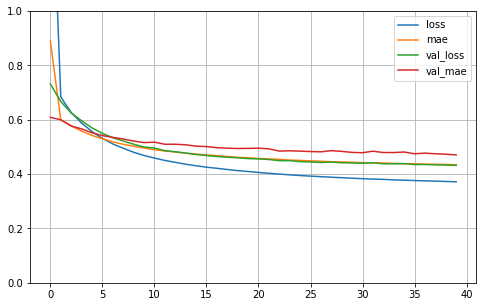

In [28]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

## Saving and Restoring

In [29]:
model.save("my_Func_model.h5")

In [30]:
%pwd

'C:\\Users\\Arpit\\Desktop\\Machine Learning\\ML and DL'

In [31]:
del model

In [32]:
keras.backend.clear_session()

In [33]:
model = keras.models.load_model("my_Func_model.h5")

In [34]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

In [35]:
y_pred = model.predict(X_new)

In [36]:
print(y_pred)

[[0.75455105]
 [1.8283502 ]
 [4.2910814 ]]


## Using Callbacks during Training

In [37]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [38]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [39]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))

In [40]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [41]:
history = model.fit(X_train,y_train,epochs=10,
                   validation_data=(X_valid,y_valid),
                   callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 4ms/step - loss: 1.8866 - val_loss: 0.7414
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6577 - val_loss: 0.6221
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5934 - val_loss: 0.5779
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5557 - val_loss: 0.5572
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5272 - val_loss: 0.5305
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5033 - val_loss: 0.5113
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4854 - val_loss: 0.4974
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4709 - val_loss: 0.4903
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4578 - val_loss: 0.4773
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4474 - val_loss: 0.4696

In [42]:
del model
keras.backend.clear_session()

In [43]:
model = keras.models.load_model("my_Func_model.h5")

In [44]:
mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3903 - mean_absolute_error: 0.4530


## Best Model Only

In [45]:
del model
keras.backend.clear_session()

In [46]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [47]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [48]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only=True)

In [49]:
history = model.fit(X_train,y_train, epochs=10,
                   validation_data=(X_valid,y_valid),
                   callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 1.4581 - val_loss: 0.8261
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7368 - val_loss: 0.6971
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6516 - val_loss: 0.6317
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5951 - val_loss: 0.5943
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5536 - val_loss: 0.5578
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5199 - val_loss: 0.5338
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4940 - val_loss: 0.5146
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4730 - val_loss: 0.4992
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4563 - val_loss: 0.4867
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4431 - val_loss: 0.4755

In [50]:
model = keras.models.load_model("Best_model.h5")

In [51]:
mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4305


## Best Model only

In [52]:
del model
keras.backend.clear_session()

In [53]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [54]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [55]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5", save_best_only=True)

In [56]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [57]:
history = model.fit(X_train,y_train, epochs=200,
                   validation_data=(X_valid,y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 3ms/step - loss: 2.5780 - val_loss: 1.2794
Epoch 2/200
363/363 [==============================] - 1s 3ms/step - loss: 1.0896 - val_loss: 0.8613
Epoch 3/200
363/363 [==============================] - 1s 3ms/step - loss: 0.8430 - val_loss: 0.7575
Epoch 4/200
363/363 [==============================] - 1s 3ms/step - loss: 0.7673 - val_loss: 0.7150
Epoch 5/200
363/363 [==============================] - 1s 3ms/step - loss: 0.7194 - val_loss: 0.6788
Epoch 6/200
363/363 [==============================] - 1s 3ms/step - loss: 0.6799 - val_loss: 0.6515
Epoch 7/200
363/363 [==============================] - 1s 4ms/step - loss: 0.6466 - val_loss: 0.6262
Epoch 8/200
363/363 [==============================] - 1s 3ms/step - loss: 0.6173 - val_loss: 0.6022
Epoch 9/200
363/363 [==============================] - 1s 3ms/step - loss: 0.5894 - val_loss: 0.5817
Epoch 10/200
363/363 [==============================] - 1s 3ms/step - loss: 0.5645 - val_lo

363/363 [==============================] - 1s 3ms/step - loss: 0.3367 - val_loss: 0.4116
Epoch 80/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3364 - val_loss: 0.4087
Epoch 81/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3358 - val_loss: 0.4083
Epoch 82/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3355 - val_loss: 0.4071
Epoch 83/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3352 - val_loss: 0.4079
Epoch 84/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3346 - val_loss: 0.4087
Epoch 85/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3343 - val_loss: 0.4105
Epoch 86/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3341 - val_loss: 0.4076
Epoch 87/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3336 - val_loss: 0.4092
Epoch 88/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3331 - val_loss: 

In [58]:
model = keras.models.load_model("early_stop_model.h5")
mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3676
